In [1]:
import numpy as np
import lsst.daf.butler as dafButler
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [2]:
def test_for_defects(butler, collection) :
    ## This function just tries to get a defect from the collection.
    ## If successfull it passes True, otherwise False.
    try :
        butler.get('defects', instrument='LATISS', detector=0, collections=collection)
        exists = True
    except :
        exists = False
    return exists

def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='k', edgecolor='none', alpha=1):
    ## This function just draws in boxes in the shapes of the defects.

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x, y), xe, ye, rotation_point='center')
                  for x, y, xe, ye in zip(xdata, ydata, xerror, yerror)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata+0.5*xerror, ydata+0.5*yerror, xerr=0.5*xerror, yerr=0.5*yerror,
                          fmt='none', ecolor=facecolor, alpha = alpha)

    return artists

In [3]:
repo = '/sdf/group/rubin/repo/embargo/butler.yaml'
## GET THE COLLECTIONS THAT HAVE DEFECTS
butler = dafButler.Butler(repo)#, collections=collection)
registry = butler.registry
defect_collections = [c for c in sorted(registry.queryCollections())  if test_for_defects(butler, c)]

#with open('defect_collections.txt', 'w') as f:
#    for col in defect_collections :
#        f.write(f"{col}\n")

## NOW VIEW ONE OF THE DEFECTS
collection = 'u/plazas/DM-38563.combined.defects.type_VALUE.hot_3.cold_0.9.2023OCT04.2/20231005T022801Z'
butler = dafButler.Butler(repo, collections=collection)
print(defect_collections)

['LATISS/calib/DM-28636/curated/19700101T000000Z', 'LATISS/calib/DM-28636/curated/20180101T000000Z', 'LATISS/calib/DM-39635/curated/19700101T000000Z', 'LATISS/calib/DM-39635/curated/20180101T000000Z', 'LATISS/calib/DM-40082/curated/19700101T000000Z', 'LATISS/calib/DM-40082/curated/20180101T000000Z', 'LATISS/calib/DM-41319/curated/19700101T000000Z', 'LATISS/calib/DM-41319/curated/20180101T000000Z', 'u/abrought/latiss/dark.2023.08.03', 'u/abrought/latiss/dark.2023.08.17', 'u/abrought/latiss/dark.2023.08.29', 'u/abrought/latiss/defects.2023.08.03', 'u/abrought/latiss/defects.2023.08.03/20230818T235959Z', 'u/abrought/latiss/defects.2023.08.17', 'u/abrought/latiss/defects.2023.08.17/20230901T160110Z', 'u/abrought/latiss/defects.2023.08.29', 'u/abrought/latiss/defects.2023.08.29/20230901T160956Z', 'u/abrought/latiss/sflat.SDSSg_65mm.2023.08.03', 'u/abrought/latiss/sflat.SDSSg_65mm.2023.08.17', 'u/abrought/latiss/sflat.SDSSg_65mm.2023.08.29', 'u/abrought/latiss/sflat.SDSSi_65mm.2023.08.03', '

In [4]:
## GET THE COLLECTIONS THAT HAVE DEFECTS
#registry = Butler.registry
#defect_collections = [c for c in sorted(registry.queryCollections()) if test_for_defects(butler, c)]

#with open('defect_collections.txt', 'w') as f:
#    for col in defect_collections :
#        f.write(f"{col}\n")


## NOW VIEW ONE OF THE DEFECTS
collection = 'u/plazas/DM-38563.combined.defects.type_VALUE.hot_3.cold_0.9.2023OCT04.2/20231005T022801Z'

butler = dafButler.Butler(repo, collections=collection)
defect_ = butler.get('defects', instrument='LATISS', detector=0, collections=collection)
#print(defect_)
defect = defect_.toTable()[0]
print(defect)

 x0   y0  width height
---- ---- ----- ------
1568    7     2      2
1570    8     1      2
2148    7     1    143
1635   11     1      1
1827   13     2      1
1706   14     1      1
2500   17     2      1
1985   21     1      4
1984   22     1      3
1986   22     1      2
 ...  ...   ...    ...
1397 3949     1      1
2827 3959     1      2
2312 3966     2      1
3683 3980     1      1
1981 3987     2      3
1983 3988     1      2
4061 3989     2      1
4059 3990     3      1
4058 3991     3      1
4057 3992     3      1
2792 3992     1      1
Length = 1341 rows


Text(0, 0.5, 'y')

<Figure size 350x350 with 0 Axes>

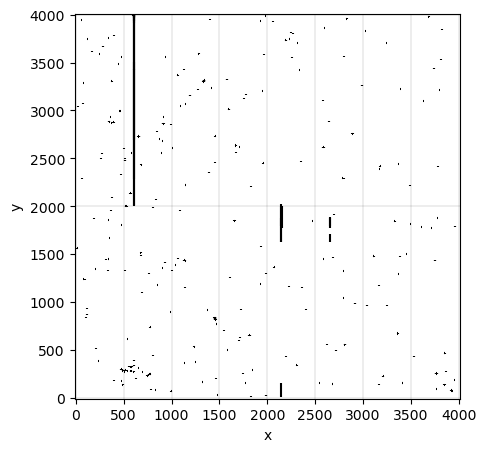

In [18]:
plt.figure(figsize = (3.5,3.5))
#figsize = (3.5,3.5)
fig, ax = plt.subplots(1,1, figsize=(5,5))
_ = make_error_boxes(ax, defect['x0'], defect['y0'], defect['width'], defect['height'])
[ax.axhline(l, lw=0.1, c='k') for l in np.linspace(0,4000,3)]
[ax.axvline(l, lw=0.1, c='k') for l in np.linspace(0,4000,9)]
ax.set_xlim(-10,4010)
ax.set_ylim(-10,4010)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.show()
#plt.savefig('/sps/lsst/users/tguillem/web/debug/defects_stack/defects.png')
#plt.close()

#plt.figure()
#plt.imshow(defectArray_copy, origin='lower', vmin=0, vmax=1, cmap='tab10') #cmap='tab10' / cmap=cmapmine
##bug
##plt.imshow(defectArray_copy, origin='lower', vmin=0, vmax=1, cmap=cmapmine)# interpolation='none') #extent=[0,4072,0,100])
#plt.colorbar()
#p#lt.title(collection[0]+'\n'+ detector_name)
#p#lt.savefig(outpath_raft+'image_'+ccds[i_ccd]+'.png')
#plt.close()

In [6]:
collection = 'u/czw/calibX.20220608'
butler2 = dafButler.Butler(repo, collections=collection)
defect_2 = butler.get('defects', instrument='LATISS',detector=0, collections=collection)
#registry = butler2.registry
#defect_collections = [c for c in sorted(registry.queryCollections())]
defect2 = defect_2.toTable()[0]
print(defect2)

 x0   y0  width height
---- ---- ----- ------
 617    0    10    350
1126    0    10    350
1620    0    10    450
1635    0    10   2000
2129    0    10    450
2144    0    10   2000
2653    0    10   2000
2130 2000    10   2000
2639 2000    10   2000
3148 2000    10   2000
 ...  ...   ...    ...
1145 3996   307      4
1621 2000    10   2000
1635 3650    10    350
1615 3955     6     45
1609 3979     6     21
1631 3979     4     21
1601 3990     8     10
1586 3994    15      6
1645 3994     9      6
1527 3996    59      4
1654 3996   307      4
Length = 54 rows


In [7]:
#defect_collections

In [8]:
defects_2 = butler.get('defects', instrument='LATISS', detector=0, collections='u/czw/calibX.20220608')
defects2 = defect_2.toTable()[0]

Text(0, 0.5, 'y')

<Figure size 350x350 with 0 Axes>

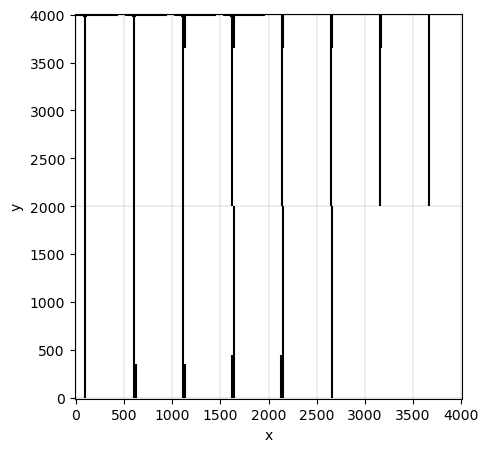

In [20]:
plt.figure(figsize = (3.5,3.5))
#figsize = (3.5,3.5)
fig, ax = plt.subplots(1,1, figsize=(5,5))
_2 = make_error_boxes(ax, defect2['x0'], defect2['y0'], defect2['width'], defect2['height'], facecolor = 'black')
[ax.axhline(l, lw=0.1, c='k') for l in np.linspace(0,4000,3)]
[ax.axvline(l, lw=0.1, c='k') for l in np.linspace(0,4000,9)]
ax.set_xlim(-10,4010)
ax.set_ylim(-10,4010)
#ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.show()
#plt.savefig('/sps/lsst/users/tguillem/web/debug/defects_stack/defects.png')
#plt.close()

#plt.figure()
#plt.imshow(defectArray_copy, origin='lower', vmin=0, vmax=1, cmap='tab10') #cmap='tab10' / cmap=cmapmine
##bug
##plt.imshow(defectArray_copy, origin='lower', vmin=0, vmax=1, cmap=cmapmine)# interpolation='none') #extent=[0,4072,0,100])
#plt.colorbar()
#p#lt.title(collection[0]+'\n'+ detector_name)
#p#lt.savefig(outpath_raft+'image_'+ccds[i_ccd]+'.png')
#plt.close()

## Overlapping

Text(0, 0.5, 'y')

<Figure size 640x480 with 0 Axes>

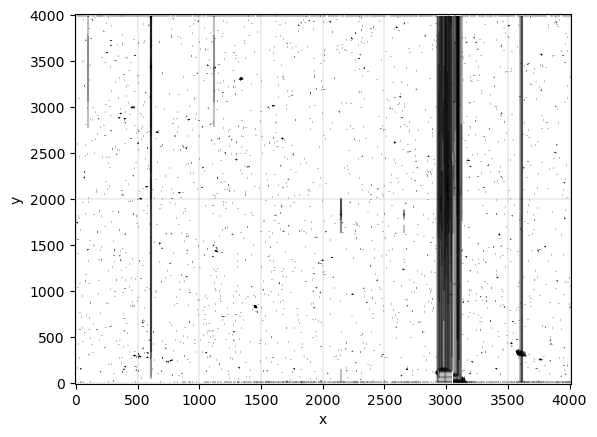

In [59]:
plt.figure()
#figsize = (3.5,3.5)
fig, ax = plt.subplots(1,1)#, figsize=figsize)
_ = make_error_boxes(ax, defect['x0'], defect['y0'], defect['width'], defect['height'], alpha = .25, facecolor = 'black')
_2 = make_error_boxes(ax, defect2['x0'], defect2['y0'], defect2['width'], defect2['height'], alpha = .25, facecolor = 'black')
[ax.axhline(l, lw=0.1, c='k') for l in np.linspace(0,4000,3)]
[ax.axvline(l, lw=0.1, c='k') for l in np.linspace(0,4000,9)]
ax.set_xlim(-10,4010)
ax.set_ylim(-10,4010)
#ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.show()
#plt.savefig('/sps/lsst/users/tguillem/web/debug/defects_stack/defects.png')
#plt.close()

#plt.figure()
#plt.imshow(defectArray_copy, origin='lower', vmin=0, vmax=1, cmap='tab10') #cmap='tab10' / cmap=cmapmine
##bug
##plt.imshow(defectArray_copy, origin='lower', vmin=0, vmax=1, cmap=cmapmine)# interpolation='none') #extent=[0,4072,0,100])
#plt.colorbar()
#p#lt.title(collection[0]+'\n'+ detector_name)
#p#lt.savefig(outpath_raft+'image_'+ccds[i_ccd]+'.png')
#plt.close()

In [40]:
def check_overlap(square1, square2):
    """
    Vérifie si deux carrés se chevauchent partiellement.
    """
    x1, y1, w1, h1 = square1['x0'], square1['y0'], square1['width'], square1['height']
    x2, y2, w2, h2 = square2['x0'], square2['y0'], square2['width'], square2['height']

    # Vérifie si les rectangles ne se chevauchent pas
    if x1 + w1 < x2 or x2 + w2 < x1 or y1 + h1 < y2 or y2 + h2 < y1:
        return False
    else:
        return True


def find_overlapping_squares(square_list1, square_list2):
    """
    Trouve tous les carrés qui se chevauchent partiellement dans deux liste.
    """
    overlapping_squares = []
    for i in range(len(square_list1)):
        for j in range(len(square_list2)):
            if check_overlap(square_list1[i], square_list2[j]):
                overlapping_squares.append((i, j))

    return overlapping_squares

In [41]:
overlapping_pairs = find_overlapping_squares(defect, defect2)

print("Carrés qui se chevauchent :")
for pair in overlapping_pairs:
    print(f"Carrés {pair[0]} et {pair[1]} se chevauchent.")

Carrés qui se chevauchent :
Carrés 0 et 212 se chevauchent.
Carrés 0 et 225 se chevauchent.
Carrés 0 et 230 se chevauchent.
Carrés 1 et 212 se chevauchent.
Carrés 1 et 213 se chevauchent.
Carrés 1 et 225 se chevauchent.
Carrés 1 et 230 se chevauchent.
Carrés 2 et 353 se chevauchent.
Carrés 2 et 377 se chevauchent.
Carrés 2 et 378 se chevauchent.
Carrés 3 et 645 se chevauchent.
Carrés 4 et 647 se chevauchent.
Carrés 5 et 649 se chevauchent.
Carrés 7 et 675 se chevauchent.
Carrés 7 et 676 se chevauchent.
Carrés 7 et 677 se chevauchent.
Carrés 8 et 675 se chevauchent.
Carrés 8 et 676 se chevauchent.
Carrés 9 et 675 se chevauchent.
Carrés 9 et 677 se chevauchent.
Carrés 10 et 699 se chevauchent.
Carrés 10 et 700 se chevauchent.
Carrés 10 et 701 se chevauchent.
Carrés 11 et 699 se chevauchent.
Carrés 11 et 701 se chevauchent.
Carrés 12 et 699 se chevauchent.
Carrés 12 et 700 se chevauchent.
Carrés 12 et 701 se chevauchent.
Carrés 13 et 710 se chevauchent.
Carrés 13 et 711 se chevauchent.
Ca

In [42]:
print(len(overlapping_pairs))

2715


In [49]:
indices_i = [pair[0] for pair in overlapping_pairs]
indices_j = [pair[1] for pair in overlapping_pairs]

In [51]:
overlapping_pairs

[(0, 212),
 (0, 225),
 (0, 230),
 (1, 212),
 (1, 213),
 (1, 225),
 (1, 230),
 (2, 353),
 (2, 377),
 (2, 378),
 (3, 645),
 (4, 647),
 (5, 649),
 (7, 675),
 (7, 676),
 (7, 677),
 (8, 675),
 (8, 676),
 (9, 675),
 (9, 677),
 (10, 699),
 (10, 700),
 (10, 701),
 (11, 699),
 (11, 701),
 (12, 699),
 (12, 700),
 (12, 701),
 (13, 710),
 (13, 711),
 (14, 725),
 (14, 726),
 (16, 817),
 (17, 822),
 (19, 829),
 (20, 833),
 (20, 834),
 (20, 835),
 (20, 836),
 (21, 833),
 (21, 834),
 (21, 837),
 (22, 833),
 (22, 834),
 (22, 835),
 (26, 870),
 (27, 1482),
 (28, 888),
 (29, 894),
 (30, 898),
 (30, 900),
 (30, 901),
 (30, 902),
 (31, 898),
 (31, 899),
 (31, 901),
 (32, 906),
 (32, 907),
 (33, 909),
 (33, 910),
 (33, 911),
 (33, 912),
 (34, 909),
 (34, 910),
 (34, 911),
 (34, 912),
 (35, 935),
 (36, 944),
 (36, 945),
 (36, 946),
 (36, 947),
 (37, 944),
 (37, 946),
 (37, 948),
 (38, 945),
 (38, 947),
 (39, 944),
 (39, 945),
 (39, 947),
 (41, 968),
 (41, 969),
 (42, 968),
 (42, 969),
 (43, 988),
 (44, 988),